<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Yasaei</h4>
<h4 align="center">Sharif University of Technology, Autumn 2024</h4>

**Student Name**: Parham Gilani

**Student ID**: 400101859

#Implementing PCA from Scratch and Using it with K-Means

## Introduction and Purpose

In this exercise, you will:

1. **Implement Principal Component Analysis (PCA) from scratch** using NumPy (without relying on `sklearn.decomposition.PCA`).
2. Apply your custom PCA to a dataset to reduce its dimensionality.
3. Run **K-Means clustering** on both the original data and the PCA-reduced data.
4. Compare the clustering results and visualize them.

**Principal Component Analysis (PCA)** is a dimensionality reduction technique that finds linear combinations of features (principal components) that explain the most variance in the data. By implementing it yourself, you will gain a deeper understanding of the underlying math (e.g., covariance matrix, eigenvalues, eigenvectors).

After reducing the data dimensions with your custom PCA, you will run K-Means clustering and evaluate whether PCA helps or hinders the clustering performance.



In [13]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt


## Part 1: Data Loading and Exploration

**Tasks:**  
- Load the Iris dataset using `sklearn.datasets.load_iris`.
- Print the shape of `X` and a few samples to understand the data.

**Question:** The Iris dataset has 4 features and 3 classes. Without looking at the labels, do you expect PCA to help cluster the data better in fewer dimensions?

asnwer: Yes, PCA is expected to help cluster the data better in fewer dimensions. The Iris dataset has only 4 features, and PCA can capture most of the variance in 2 or 3 principal components, simplifying the data structure. Since the classes in the Iris dataset are relatively well-separated, reducing dimensions with PCA can enhance clustering by eliminating noise and focusing on the most significant patterns in the data.


In [2]:
# TODO: Load Iris dataset and print basic info

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Print basic information about the dataset
print("Shape of X:", X.shape)
print("First 5 rows:\n", X[:5])

Shape of X: (150, 4)
First 5 rows:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


## Part 2: Data Preprocessing (Scaling)

PCA and K-Means are sensitive to feature scales. Standardize the data before applying PCA.

**Tasks:**  
- Scale the data using StandardScaler.
- Print the mean and variance of the scaled data to confirm.

**Hint:** Use `StandardScaler` from `sklearn.preprocessing`.


In [4]:
# TODO: Scale the data

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

# Print the mean and standard deviation of the scaled data
print("Mean after scaling:", X_scaled.mean(axis=0))
print("Std after scaling:", X_scaled.std(axis=0))


Mean after scaling: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Std after scaling: [1. 1. 1. 1.]


## Part 3: Implementing PCA from Scratch

We will:
1. Compute the covariance matrix of the scaled data.
2. Find its eigenvalues and eigenvectors.
3. Sort eigenvectors by their eigenvalues in descending order.
4. Select the top `n_components` principal components.
5. Project the data onto these principal components.

**Tasks:**
Implement a `my_pca(X, n_components)` function that:
 - Computes the covariance matrix.
 - Performs eigen decomposition.
 - Sorts eigenvectors by eigenvalues.
 - Returns the projected data and the selected eigenvectors, as well as explained variance ratio.

**Question:** Why do we pick the eigenvectors with the largest eigenvalues as the principal components?

answer: Eigenvectors with the largest eigenvalues capture the directions of maximum variance in the dataset. By projecting data onto these directions, we preserve the most important information while reducing dimensionality.

In [16]:
# TODO: Implement PCA from scratch

def my_pca(X, n_components=2):
    # Step 1: Compute the covariance matrix
    cov_matrix = np.cov(X, rowvar=False)  # Shape: (D, D)

    # Step 2: Perform eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)  # Shapes: (D,), (D, D)

    # Step 3: Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Step 4: Select the top n_components
    selected_eigenvectors = eigenvectors[:, :n_components]  # Shape: (D, n_components)
    selected_eigenvalues = eigenvalues[:n_components]

    # Step 5: Project data onto the selected components
    Z = np.dot(X, selected_eigenvectors)  # Shape: (N, n_components)

    # Compute explained variance ratio
    explained_variance_ratio = selected_eigenvalues / np.sum(eigenvalues)

    return Z, selected_eigenvectors, explained_variance_ratio

# Test your my_pca function
Z, eigvecs, exp_var_ratio = my_pca(X_scaled, n_components=2)
print("Shape of projected data:", Z.shape)
print("Explained variance ratio:", exp_var_ratio)


Shape of projected data: (150, 2)
Explained variance ratio: [0.72962445 0.22850762]


## Part 4: Comparing K-Means Clustering Before and After PCA

We will:
1. Run K-Means clustering on the original scaled data.
2. Run K-Means clustering on the PCA-reduced data (from `my_pca`).

**Tasks:**  
- Perform K-Means with `k=3` (since Iris has 3 classes).
- Extract cluster labels from both runs.

**Hint:** Use `KMeans` from `sklearn.cluster`.

**Question:** Do you think clustering on just the first two principal components will yield a similar or better ARI score than using all features?

answer: Clustering on the first two principal components is likely to yield a similar or slightly better ARI score than using all features. PCA focuses on the most important variance in the data, which can help K-Means find clearer clusters.

In [25]:
# TODO: K-Means on original scaled data
kmeans_original = KMeans(n_clusters=3)
labels_original = kmeans_original.fit_predict(X_scaled)

# TODO: K-Means on PCA data
kmeans_pca = KMeans(n_clusters=3)
labels_pca = kmeans_pca.fit_predict(Z)  # Use the data projected by my_pca

# Evaluate clustering performance using ARI (Adjusted Rand Index)
ari_original = adjusted_rand_score(y, labels_original)
ari_pca = adjusted_rand_score(y, labels_pca)

print("ARI (Original Data):", ari_original)
print("ARI (PCA Data):", ari_pca)


ARI (Original Data): 0.645147003482001
ARI (PCA Data): 0.6011286543750637


## Part 5: Evaluating the Clusters

Use Adjusted Rand Index (ARI) to see how well clusters align with the true labels.

**Tasks:**  
- Compute ARI for both sets of labels against `y`.
- Print and compare.

**Hint:** `from sklearn.metrics import adjusted_rand_score`.


In [26]:
# TODO: Compute ARI scores

# Compute ARI for clusters on original scaled data
ari_original = adjusted_rand_score(y, labels_original)

# Compute ARI for clusters on PCA-reduced data
ari_pca = adjusted_rand_score(y, labels_pca)

# Print the ARI scores
print("ARI (Original):", ari_original)
print("ARI (PCA):", ari_pca)

ARI (Original): 0.645147003482001
ARI (PCA): 0.6011286543750637


## Part 6: Visualizing the PCA Results

Visualize the PCA-reduced data and the clusters.

**Tasks:**  
- Plot `Z[:,0]` vs `Z[:,1]` and color by `labels_pca`.
- (Optional) Also plot true labels to compare how well the clusters match.

**Hint:** Use `matplotlib.pyplot.scatter`.


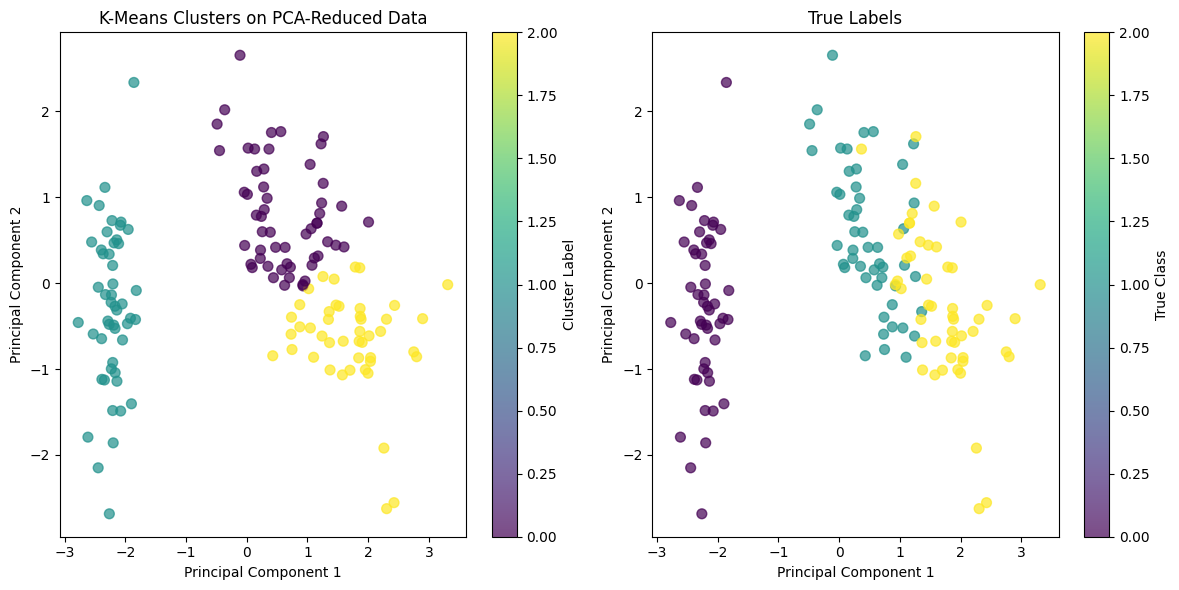

In [27]:
# TODO: Visualize PCA results

# Step 1: Visualize clusters from K-Means on PCA-reduced data
plt.figure(figsize=(12, 6))

# Plot PCA-reduced data colored by K-Means labels
plt.subplot(1, 2, 1)
plt.scatter(Z[:, 0], Z[:, 1], c=labels_pca, cmap='viridis', s=50, alpha=0.7)
plt.title("K-Means Clusters on PCA-Reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster Label")

# Step 2: Visualize true labels for comparison
plt.subplot(1, 2, 2)
plt.scatter(Z[:, 0], Z[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
plt.title("True Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="True Class")

# Display the plots
plt.tight_layout()
plt.show()

